# Random forrest IDS

In [ ]:
from datasets import load_dataset
ds = load_dataset("c01dsnap/CIC-IDS2017")

In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Coun

## Data analyst

In [ ]:
#Get colums name
print(ds['train'].column_names)


[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

**Norm name of feature colums**

In [ ]:
current_column_names = ds["train"].column_names
stripped_column_names = {col: col.strip() for col in current_column_names}
ds["train"] = ds["train"].rename_columns(stripped_column_names)
print(ds['train'].column_names)

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

**Get and analyze labels class counting**

In [ ]:
# Get unique labels
unique_labels = set(ds['train']['Label'])
print("Original unique labels:", unique_labels)

Original unique labels: {'DoS Hulk', 'Infiltration', 'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'DoS slowloris', 'DDoS', 'FTP-Patator', 'DoS GoldenEye', 'Web Attack � XSS', 'Heartbleed', 'DoS Slowhttptest', 'BENIGN', 'Bot', 'PortScan', 'SSH-Patator'}


In [ ]:
# Count occurrences of each label
label_counts = {}
for label in ds['train']['Label']:
    label = label.strip() # Use the stripped label
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Print the label counts
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")

Label: BENIGN, Count: 2273097
Label: DDoS, Count: 128027
Label: PortScan, Count: 158930
Label: Bot, Count: 1966
Label: Infiltration, Count: 36
Label: Web Attack � Brute Force, Count: 1507
Label: Web Attack � XSS, Count: 652
Label: Web Attack � Sql Injection, Count: 21
Label: FTP-Patator, Count: 7938
Label: SSH-Patator, Count: 5897
Label: DoS slowloris, Count: 5796
Label: DoS Slowhttptest, Count: 5499
Label: DoS Hulk, Count: 231073
Label: DoS GoldenEye, Count: 10293
Label: Heartbleed, Count: 11


Category: Normal, Count: 2273097
Category: Unauthorized Access, Count: 176958
Category: DDoS, Count: 380688


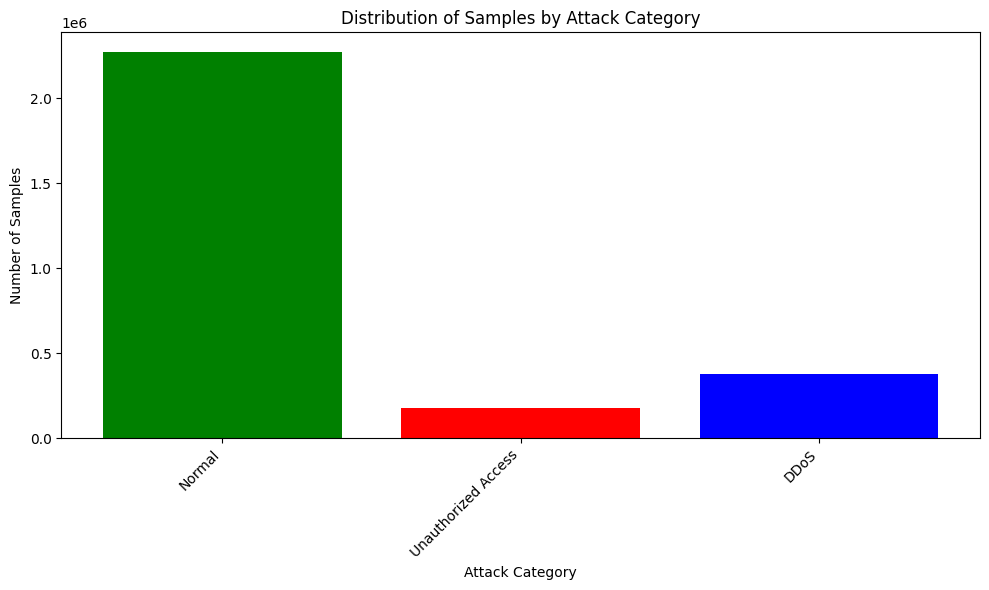

In [ ]:
import matplotlib.pyplot as plt
#Counting label
label_category_mapping = {
    'BENIGN': 'Normal',
    'DoS Hulk': 'DDoS',
    'DoS GoldenEye': 'DDoS',
    'DoS slowloris': 'DDoS',
    'DoS Slowhttptest': 'DDoS',
    'DDoS': 'DDoS',
    'PortScan': 'Unauthorized Access', # Mapping PortScan to Unauthorized Access as it can be a prelude to unauthorized access
    'FTP-Patator': 'Unauthorized Access', # Mapping Brute Force to Unauthorized Access
    'SSH-Patator': 'Unauthorized Access', # Mapping Brute Force to Unauthorized Access
    'Web Attack � Brute Force': 'Unauthorized Access', # Mapping Web Attacks to Unauthorized Access
    'Web Attack � XSS': 'Unauthorized Access',
    'Web Attack � Sql Injection': 'Unauthorized Access',
    'Infiltration': 'Unauthorized Access',
    'Bot': 'Unauthorized Access', # Mapping Botnet activities to Unauthorized Access
    'Heartbleed': 'Unauthorized Access' # Mapping Exploits to Unauthorized Access
}

# Initialize counts for the new categories
categorized_counts = {
    'Normal': 0,
    'Unauthorized Access': 0,
    'DDoS': 0
}

# Sum counts based on the mapping
for label, count in label_counts.items():
    if label in label_category_mapping:
        category = label_category_mapping[label]
        categorized_counts[category] += count
    else:
        print(f"Warning: Label '{label}' not found in mapping.")

# Print the categorized counts
for category, count in categorized_counts.items():
    print(f"Category: {category}, Count: {count}")

# Prepare data for plotting
categories = list(categorized_counts.keys())
counts = list(categorized_counts.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['green', 'red', 'blue'])
plt.xlabel("Attack Category")
plt.ylabel("Number of Samples")
plt.title("Distribution of Samples by Attack Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Feature Selection and Norm label

## Feature selection

**Based on the paper, we have decided on 38 important features that we need**

In [ ]:
importance_colums = [
    "PSH Flag Count", "min_seg_size_forward", "Flow IAT Max", "Flow IAT Min", "ACK Flag Count", "Destination Port", "Bwd Packet Length Mean", "Bwd Packet Length Max", "Bwd Packet Length Min", "Init_Win_bytes_forward",
    "Fwd IAT Max", "Idle Mean", "Idle Max", "Avg Bwd Segment Size", "Bwd Packet Length Std", "Bwd IAT Mean", "Fwd IAT Std", "Down/Up Ratio", "Max Packet Length", "Average Packet Size",
    "Min Packet Length", "Packet Length Std", "Fwd Packets/s", "Packet Length Mean", "Flow IAT Std", "URG Flag Count", "FIN Flag Count", "Fwd Packet Length Min", "Subflow Fwd Packets", "Bwd IAT Max",
    "Packet Length Variance", "Fwd IAT Mean", "Flow Duration", "Fwd IAT Total", "Bwd IAT Std", "Flow IAT Mean"
]

In [ ]:
# Get the actual column names from the dataset
dataset_columns = ds['train'].column_names

# Check if all importance_colums are in dataset_columns
missing_columns = [col for col in importance_colums if col not in dataset_columns]

if not missing_columns:
    print("All columns in importance_colums are present in the dataset.")
else:
    print("The following columns from importance_colums are NOT found in the dataset:")
    for col in missing_columns:
        print(col)

All columns in importance_colums are present in the dataset.


In [ ]:
# Print data type of each column
for column in importance_colums:
    if len(ds['train'][column]) > 0:
        print(f"Column '{column}': {type(ds['train'][column][0])}")
    else:
        print(f"Column '{column}': (empty)")

Column 'PSH Flag Count': <class 'int'>
Column 'min_seg_size_forward': <class 'int'>
Column 'Flow IAT Max': <class 'int'>
Column 'Flow IAT Min': <class 'int'>
Column 'ACK Flag Count': <class 'int'>
Column 'Destination Port': <class 'int'>
Column 'Bwd Packet Length Mean': <class 'float'>
Column 'Bwd Packet Length Max': <class 'int'>
Column 'Bwd Packet Length Min': <class 'int'>
Column 'Init_Win_bytes_forward': <class 'int'>
Column 'Fwd IAT Max': <class 'int'>
Column 'Idle Mean': <class 'float'>
Column 'Idle Max': <class 'int'>
Column 'Avg Bwd Segment Size': <class 'float'>
Column 'Bwd Packet Length Std': <class 'float'>
Column 'Bwd IAT Mean': <class 'float'>
Column 'Fwd IAT Std': <class 'float'>
Column 'Down/Up Ratio': <class 'int'>
Column 'Max Packet Length': <class 'int'>
Column 'Average Packet Size': <class 'float'>
Column 'Min Packet Length': <class 'int'>
Column 'Packet Length Std': <class 'float'>
Column 'Fwd Packets/s': <class 'float'>
Column 'Packet Length Mean': <class 'float'>


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from functools import partial

def scale_numerical_features(data_df, importance_colums_):
    scaler = StandardScaler()
    # Extract numerical columns as a numpy array
    numerical_data = np.array([data_df[col] for col in importance_colums_]).T
    # Apply scaling
    scaled_data = scaler.fit_transform(numerical_data)
    # Update the examples with scaled data
    for i, col in enumerate(importance_colums_):
        data_df[col] = scaled_data[:, i].tolist()
    return data_df

# Apply the scaling function to the dataset
# Using batched=True for efficiency
ds['train'] = ds['train'].map(partial(scale_numerical_features, importance_colums_=importance_colums), batched=True)

print("Numerical features in importance_colums have been scaled.")

Map:   0%|          | 0/2830743 [00:00<?, ? examples/s]

Numerical features in importance_colums have been scaled.


In [ ]:
from imblearn.over_sampling import SMOTE
from datasets import Dataset
import numpy as np
import tqdm
# Separate the majority class (BENIGN)
majority_class_name = 'Normal'
majority_original_label = 'BENIGN' # Original label for Normal class
majority_class_dataset = ds['train'].filter(lambda example: example['Label'] == majority_original_label)

# Determine the target number of samples for the majority class
# Aim for the total of DDoS and Unauthorized Access to be roughly equal to the undersampled Normal count.
target_majority_count = categorized_counts['DDoS'] + 50000 # Keep the undersampled Normal count as before
undersampled_majority_dataset = majority_class_dataset.shuffle(seed=42).select(range(target_majority_count))

print(f"Undersampled 'Normal' class count: {len(undersampled_majority_dataset)}")

# Prepare to oversample minority classes
final_oversampled_minority_datasets = []

# Group by categorized label and oversample categories
print("\nApplying SMOTE to balance categorized minority classes...")

categorized_minority_datasets = {}
for original_label in unique_labels:
    stripped_label = original_label.strip()
    category = label_category_mapping.get(stripped_label)
    if category and category != majority_class_name:
        if category not in categorized_minority_datasets:
            categorized_minority_datasets[category] = []
        # Filter the dataset for the current original label and add to the list for its category
        original_label_ds = ds['train'].filter(lambda example: example['Label'].strip() == stripped_label)
        if len(original_label_ds) > 0:
             categorized_minority_datasets[category].append(original_label_ds)


for category, list_of_datasets in tqdm.tqdm(categorized_minority_datasets.items(), desc = "Processing"):
    if list_of_datasets:
        print(f"Processing category: {category}")
        # Concatenate datasets within the same category
        combined_category_ds = Dataset.from_dict({col: [item for ds_item in list_of_datasets for item in ds_item[col]] for col in list_of_datasets[0].column_names})

        if len(combined_category_ds) > 0:
            # Extract features and original labels for SMOTE
            X_category = np.array([combined_category_ds[col] for col in importance_colums]).T
            y_category_original_labels = np.array([label.strip() for label in combined_category_ds['Label']])

            # SMOTE needs numerical labels, let's map original labels to integers for SMOTE
            unique_original_minority_labels = np.unique(y_category_original_labels)
            label_to_int = {label: i for i, label in enumerate(unique_original_minority_labels)}
            y_category_int = np.array([label_to_int[label] for label in y_category_original_labels])

            # Define the target counts for the minority categories
            # We want the sum of 'Unauthorized Access' and 'DDoS' to be around target_majority_count.
            # Let's oversample each original label within these categories proportionally to reach the total target for the category.
            category_target_count = target_majority_count // len(categorized_minority_datasets) # Distribute target equally among categories

            # Calculate target counts for each original label within the category to reach the category target
            current_original_label_counts = {label: np.sum(y_category_original_labels == label) for label in unique_original_minority_labels}
            total_current_category_count = sum(current_original_label_counts.values())

            original_label_target_counts_in_category = {}
            for original_label, count in current_original_label_counts.items():
                 if total_current_category_count > 0:
                      proportion = count / total_current_category_count
                      original_label_target_counts_in_category[label_to_int[original_label]] = max(count, int(category_target_count * proportion))
                 else:
                      original_label_target_counts_in_category[label_to_int[original_label]] = count


            print(f"Target counts for original labels within {category} (mapped to int): {original_label_target_counts_in_category}")

            # Apply SMOTE to balance the original labels within the categorized minority dataset
            # Ensure there are at least two classes in y_category_int for SMOTE
            if np.unique(y_category_int).size > 1:
                smote = SMOTE(sampling_strategy=original_label_target_counts_in_category, random_state=42)
                X_resampled_category, y_resampled_category_int = smote.fit_resample(X_category, y_category_int)

                # Map the integer labels back to original labels
                int_to_label = {i: label for label, i in label_to_int.items()}
                y_resampled_category_original_labels = np.array([int_to_label[i] for i in y_resampled_category_int])

                print(f"  Original samples count in {category}: {len(combined_category_ds)}")
                print(f"  Resampled samples count in {category}: {len(X_resampled_category)}")

                # Create a new dataset from the resampled data for this category
                resampled_category_dict = {col: X_resampled_category[:, i].tolist() for i, col in enumerate(importance_colums)}
                # Store the categorized label for the resampled data
                resampled_category_dict['Label'] = [label_category_mapping[label] for label in y_resampled_category_original_labels]
                final_oversampled_minority_datasets.append(Dataset.from_dict(resampled_category_dict))

            else:
                print(f"  Only one original label found in category {category}. Cannot apply SMOTE for balancing original labels within the category. Keeping original samples.")
                # If only one original label in the category, keep the original samples in that category
                category_dict = {col: combined_category_ds[col] for col in importance_colums}
                category_dict['Label'] = [label_category_mapping[label.strip()] for label in combined_category_ds['Label']]
                final_oversampled_minority_datasets.append(Dataset.from_dict(category_dict))


        else:
            print(f"  No samples found in category {category}. Skipping SMOTE.")


# Combine the undersampled majority dataset with the final oversampled minority datasets
if final_oversampled_minority_datasets:
    # Ensure all datasets to be combined have the same columns
    all_datasets_to_combine = [undersampled_majority_dataset] + final_oversampled_minority_datasets
    common_cols = list(set.intersection(*[set(ds_item.column_names) for ds_item in all_datasets_to_combine]))

    balanced_ds_dict = {}
    for col in common_cols:
        balanced_ds_dict[col] = []
        for ds_item in all_datasets_to_combine:
            # Ensure the column exists in the current dataset before extending
            if col in ds_item.column_names:
                balanced_ds_dict[col].extend(ds_item[col])


    balanced_ds = Dataset.from_dict(balanced_ds_dict)

else:
    # If no minority datasets, balanced dataset is just the undersampled majority
    balanced_ds = undersampled_majority_dataset

print("\nDataset balancing complete.")
print(f"Balanced dataset size: {len(balanced_ds)}")

# Verify the new class distribution
balanced_label_counts = {}
for label in balanced_ds['Label']:
    if label in balanced_label_counts:
        balanced_label_counts[label] += 1
    else:
        balanced_label_counts[label] = 1

print("Balanced dataset categorized label counts:")
for category, count in balanced_label_counts.items():
    print(f"  {category}: {count}")

Undersampled 'Normal' class count: 430688

Applying SMOTE to balance categorized minority classes...
Processing category: DDoS
Target counts for original labels within DDoS (mapped to int): {0: np.int64(128027), 1: np.int64(10293), 2: np.int64(231073), 3: np.int64(5499), 4: np.int64(5796)}
  Original samples count in DDoS: 380688
  Resampled samples count in DDoS: 380688
Processing category: Unauthorized Access
Target counts for original labels within Unauthorized Access (mapped to int): {0: 2392, 1: 9659, 2: 13, 3: 43, 4: 193405, 5: 7176, 6: 1833, 7: 25, 8: 793}
  Original samples count in Unauthorized Access: 176958
  Resampled samples count in Unauthorized Access: 215339

Dataset balancing complete.
Balanced dataset size: 1026715
Balanced dataset categorized label counts:
  BENIGN: 430688
  DDoS: 380688
  Unauthorized Access: 215339


In [ ]:
import pandas as pd

# Convert the balanced dataset to a pandas DataFrame
balanced_df = pd.DataFrame(balanced_ds)

# Remove rows with any null or NaN values
balanced_df.dropna(inplace=True)
balanced_df.fillna(0, inplace=True)
# Define the output file path
output_csv_path = '/content/balanced_dataset.csv'

# Export the DataFrame to a CSV file
balanced_df.to_csv(output_csv_path, index=False)

print(f"Balanced dataset exported to {output_csv_path}")

Balanced dataset exported to /content/balanced_dataset.csv


Note: Tham khảo thêm "https://www.kaggle.com/code/sweety18/cicids2017-random-forest-thursday-web-attacks"

In [ ]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df.head(10)

,Flow Duration,PSH Flag Count,min_seg_size_forward,Flow IAT Mean,Destination Port,Idle Max,Label,Average Packet Size,Flow IAT Min,URG Flag Count,...,Init_Win_bytes_forward,Fwd IAT Max,Fwd IAT Std,Min Packet Length,Fwd IAT Mean,Flow IAT Max,Fwd IAT Total,ACK Flag Count,Avg Bwd Segment Size,Bwd IAT Mean
0,-0.117048,0.234533,0.293268,-0.087712,1.443713,-0.104014,Unauthorized Access,-0.186356,-0.105553,0.000000,...,0.289853,-0.102098,-0.079854,-0.209906,-0.079260,-0.108185,-0.112674,-0.102597,-0.164581,-0.078941
1,-0.273096,0.724148,0.278247,-0.167994,0.018393,-0.201042,Unauthorized Access,-0.466335,-0.139718,-0.181818,...,-0.227717,-0.216211,-0.239888,-0.502039,-0.150475,-0.217971,-0.271024,-0.381412,-0.407991,-0.145811
2,-0.051712,0.095298,0.105949,-0.051689,-0.247264,-0.051709,Unauthorized Access,-0.033629,-0.008592,-0.031639,...,0.095293,-0.051711,-0.059383,-0.031639,-0.051710,-0.051728,-0.051711,-0.089803,-0.012465,-0.051709
3,0.529345,-0.054855,0.735413,0.520252,-0.139267,0.538033,DDoS,0.590329,-0.035638,0.000000,...,-0.018491,0.538031,0.679028,-0.054601,0.718470,0.538028,0.528814,0.588128,0.324322,-0.537357
4,-0.494954,-0.657773,-0.844052,-0.320974,3.674422,-0.358840,BENIGN,8.307741,-0.354320,-0.135388,...,0.688258,-0.369464,-0.333859,-0.712408,-0.261393,-0.381535,-0.486854,1.916480,-0.658855,-0.262975
5,-0.346309,-0.537271,-0.428513,-0.284073,-0.137916,-0.269560,BENIGN,-0.266584,-0.239841,-0.214535,...,-0.420691,-0.304368,-0.328034,1.188641,-0.224131,-0.308715,-0.340261,-0.381412,-0.339045,-0.212780
6,-0.054841,0.142857,-0.051057,-0.045770,-0.654398,-0.046595,Unauthorized Access,-0.029862,-0.001268,-0.110208,...,0.132781,-0.046596,-0.031639,0.099484,-0.045494,-0.046596,-0.054841,-0.142857,-0.025689,-0.045405
7,-0.431301,-0.589668,0.051653,-0.251466,-0.389806,-0.261674,BENIGN,-0.552686,-0.052330,-0.322107,...,-0.611133,-0.289616,-0.354540,0.122407,-0.206579,-0.292712,-0.425746,-0.450965,-0.508584,-0.197136
8,-0.084007,0.557329,0.000000,-0.088906,-0.127473,-0.070887,DDoS,0.344236,-0.252709,-0.031639,...,0.557431,-0.084955,-0.088631,0.000000,-0.098751,-0.075076,-0.088722,-0.563492,0.173464,-0.080149
9,0.550491,-0.219586,0.886405,0.405775,-0.123299,0.552268,DDoS,0.257911,-0.207596,0.000000,...,-0.208641,0.552299,0.446918,0.000000,0.296377,0.552370,0.546896,0.695471,0.274940,-0.513298
